In [132]:
import pandas as pd
import numpy as np
from plot_cdf import plot_cdf, plot_cdf_multiple
import matplotlib.pyplot as plt
import json
import os
import glob

In [1]:
traces = [
          "WIRED_900kbps",
          "WIRED_35mbps",
          "WIRED_200kbps", 
          "4G_700kbps",
          "4G_3mbps",
          "4G_500kbps",
          "5G_12mbps",
          "5G_13mbps",
          "trace_300k",
]

In [134]:
result_dir = os.listdir("/home/det_user/dmarkudova/RL_rtc/output_mp/")
big_list_results = []

for filename in result_dir:
    
    # if (not "reward_profile" in filename) or (not "seed" in filename):
    #     continue
    if ("big_trace2" in filename) or (not "seed_22" in filename):
        continue
    
    pickle_path = "../output_mp/" + filename
    l_rate = pd.read_pickle(pickle_path)
    conf_name = pickle_path.split("/")[2].split(".")[0][17:]
    if "big_trace2" in pickle_path:
        trace_name = "./big_trace/big_trace2.json"
    else:
        trace_name = "./traces/" + pickle_path.split("_")[5] + "_" + pickle_path.split("_")[6] + ".json"
    
    d_splitted = conf_name.split("_")
    alg = d_splitted[0]
    step_time = int(d_splitted[3])
    
    if "seed" in d_splitted:
        seed = int(d_splitted[15])
    else:
        seed = 0
    
    if "reward" in d_splitted: 
        reward_profile = int(d_splitted[13])
    else:
        reward_profile = 0
    
    if d_splitted[5] == "True":
        delay_states = True
    else:
        delay_states = False
    if d_splitted[8] == "True":
        normalize_states = True
    else:
        normalize_states = False
    if d_splitted[10].split(".")[0] == "True":
        tuned = True
    else:
        tuned = False
        
    if normalize_states == False:
        continue
    
    avg_reward_list = []
    cum_reward_list = []
    for i in range(15):
        if i in l_rate[trace_name].keys():
            reward_series = pd.Series(l_rate[trace_name][i]["reward"])
            avg_reward_list.append(reward_series.mean())
            cum_reward_list.append(reward_series.sum())
    
    d_final = {
         'trace': trace_name.split("/")[2].split(".")[0],
         'delay_states': delay_states,
         'normalize_states': normalize_states,
         'step_time': step_time,
         'alg': alg,
         'tuned': tuned,
         'last_cum_reward': cum_reward_list[-1],
         'last_avg_reward': avg_reward_list[-1],
         'cum_reward_list': cum_reward_list,
         'avg_reward_list': avg_reward_list,
         'name': conf_name,
         'reward_profile': reward_profile,
         'seed': seed,
        }
    
    big_list_results.append(d_final)

In [135]:
df = pd.DataFrame(big_list_results)
df

,trace,delay_states,normalize_states,step_time,alg,tuned,last_cum_reward,last_avg_reward,cum_reward_list,avg_reward_list,name,reward_profile,seed
0,5G_13mbps,False,True,200,TD3,False,-43.209139,-0.142135,"[-44.765443899999994, -50.7771878, -38.8453823...","[-0.14725474967105265, -0.16703022302631573, -...",TD3_5G_13mbps_200_delay_False_norm_states_True...,0,22
1,4G_700kbps,False,True,200,TD3,True,83.413480,0.156205,"[-20.80708, 55.591080000000005, 47.40480000000...","[-0.03896456928838953, 0.1041031460674157, 0.0...",TD3_4G_700kbps_200_delay_False_norm_states_Tru...,0,22
2,5G_12mbps,False,True,200,TD3,False,-47.224400,-0.154328,"[-69.830737, -69.830737, -51.367208500000004, ...","[-0.22820502287581695, -0.22820502287581695, -...",TD3_5G_12mbps_200_delay_False_norm_states_True...,0,22
3,4G_3mbps,True,True,200,TD3,False,-97.800102,-0.320656,"[-106.24891237088985, -102.47825851843818, -11...","[-0.3483570897406223, -0.3359942902243874, -0....",TD3_4G_3mbps_200_delay_True_norm_states_True_t...,0,22
4,WIRED_900kbps,True,True,200,SAC,True,127.754417,0.442057,"[125.1221406150989, 138.92897337803666, 133.83...","[0.4329485834432487, 0.48072309127348334, 0.46...",SAC_WIRED_900kbps_200_delay_True_norm_states_T...,0,22
5,trace_300k,True,True,200,SAC,True,151.441601,0.503128,"[140.31031138986668, 160.5906495175111, 168.26...","[0.46614721391982267, 0.5335237525498717, 0.55...",SAC_trace_300k_200_delay_True_norm_states_True...,0,22
6,trace_300k,True,True,200,SAC,False,106.362984,0.353365,"[49.027928639999985, 71.45523209244445, 110.37...","[0.16288348385382143, 0.23739279764931795, 0.3...",SAC_trace_300k_200_delay_True_norm_states_True...,0,22
7,5G_12mbps,True,True,200,TD3,True,-45.324067,-0.148118,"[-52.83266661539328, -46.91256120060624, -46.9...","[-0.17265577325291914, -0.15330902353139264, -...",TD3_5G_12mbps_200_delay_True_norm_states_True_...,0,22
8,WIRED_200kbps,True,True,200,SAC,False,94.883832,0.085098,"[22.92103046836131, 60.946984493873494, 67.171...","[0.020556977998530315, 0.05466097264024529, 0....",SAC_WIRED_200kbps_200_delay_True_norm_states_T...,0,22
9,trace_300k,False,True,200,TD3,False,-6.316560,-0.020985,"[-6.316560000000002, -6.316560000000002, -6.31...","[-0.020985249169435335, -0.020985249169435335,...",TD3_trace_300k_200_delay_False_norm_states_Tru...,0,22


## Group by trace

In [139]:
df_grouped = df.groupby(["trace", "step_time", "alg", "delay_states", "tuned", "reward_profile", "seed", "name"]).agg(
    {"last_cum_reward": np.mean, "last_avg_reward": np.mean}).reset_index()

df_sorted = df_grouped.sort_values(["trace", "last_avg_reward"], ascending=False)
df_sorted

,trace,step_time,alg,delay_states,tuned,reward_profile,seed,name,last_cum_reward,last_avg_reward
52,trace_300k,200,TD3,True,False,0,22,TD3_trace_300k_200_delay_True_norm_states_True...,179.884072,0.597622
53,trace_300k,200,TD3,True,True,0,22,TD3_trace_300k_200_delay_True_norm_states_True...,151.515923,0.503375
49,trace_300k,200,SAC,True,True,0,22,SAC_trace_300k_200_delay_True_norm_states_True...,151.441601,0.503128
48,trace_300k,200,SAC,True,False,0,22,SAC_trace_300k_200_delay_True_norm_states_True...,106.362984,0.353365
50,trace_300k,200,TD3,False,False,0,22,TD3_trace_300k_200_delay_False_norm_states_Tru...,-6.316560,-0.020985
51,trace_300k,200,TD3,False,True,0,22,TD3_trace_300k_200_delay_False_norm_states_Tru...,-6.316560,-0.020985
44,WIRED_900kbps,200,TD3,False,False,0,22,TD3_WIRED_900kbps_200_delay_False_norm_states_...,148.567960,0.514076
46,WIRED_900kbps,200,TD3,True,False,0,22,TD3_WIRED_900kbps_200_delay_True_norm_states_T...,144.668703,0.500584
47,WIRED_900kbps,200,TD3,True,True,0,22,TD3_WIRED_900kbps_200_delay_True_norm_states_T...,144.051711,0.498449
45,WIRED_900kbps,200,TD3,False,True,0,22,TD3_WIRED_900kbps_200_delay_False_norm_states_...,141.821800,0.490733


In [140]:
len(df_sorted)

54

In [141]:
for i in df_sorted.groupby("trace").first()["name"].iteritems():
    print(i)

('4G_3mbps', 'TD3_4G_3mbps_200_delay_True_norm_states_True_tuned_True_reward_profile_0_seed_22')
('4G_500kbps', 'TD3_4G_500kbps_200_delay_True_norm_states_True_tuned_False_reward_profile_0_seed_22')
('4G_700kbps', 'SAC_4G_700kbps_200_delay_True_norm_states_True_tuned_False_reward_profile_0_seed_22')
('5G_12mbps', 'TD3_5G_12mbps_200_delay_True_norm_states_True_tuned_False_reward_profile_0_seed_22')
('5G_13mbps', 'TD3_5G_13mbps_200_delay_False_norm_states_True_tuned_False_reward_profile_0_seed_22')
('WIRED_200kbps', 'TD3_WIRED_200kbps_200_delay_False_norm_states_True_tuned_True_reward_profile_0_seed_22')
('WIRED_35mbps', 'TD3_WIRED_35mbps_200_delay_True_norm_states_True_tuned_True_reward_profile_0_seed_22')
('WIRED_900kbps', 'TD3_WIRED_900kbps_200_delay_False_norm_states_True_tuned_False_reward_profile_0_seed_22')
('trace_300k', 'TD3_trace_300k_200_delay_True_norm_states_True_tuned_False_reward_profile_0_seed_22')


In [ ]:
traces = [
          "WIRED_900kbps",
          "WIRED_35mbps",
          "WIRED_200kbps", 
          "4G_700kbps",
          "4G_3mbps",
          "4G_500kbps",
          "5G_12mbps",
          "5G_13mbps",
          "trace_300k",
]

In [101]:
df_grouped[(df_grouped.index.get_level_values(0) == "WIRED_35mbps") & \
           (df_grouped.index.get_level_values(1) == 200)
          ].sort_values("last_cum_reward", ascending=False)

last_cum_reward  \
trace        step_time alg delay_states tuned reward_profile seed                    
WIRED_35mbps 200       TD3 False        True  1              36          -6.112984   
                                              0              36          -6.381980   
                       SAC False        False 0              0           -6.657720   
                       TD3 False        True  2              42          -7.009864   
                                              1              42          -8.547053   
                                              2              0           -9.313280   
                                              3              42          -9.683825   
                                              2              36         -11.391203   
                                              3              36         -11.917973   
                                              0              42         -12.656560   
                                                             0          -12.679936   
                                              1              0          -13.766440   
                       PPO False        False 0              0          -13.796582   
                       TD3 True         True  0              0          -13.796582   
                           False        False 0              0          -13.927696   
                                        True  4              36         -14.301858   
                       SAC True         False 0              0          -14.698600   
                       TD3 True         False 0              0          -15.419165   
                       PPO True         False 0              0          -18.157619   
                       TD3 False        True  4              0          -18.477560   
                                              3              0          -18.952240   
                                              4              42         -22.873040   
                       SAC True         True  0              0          -23.339688   
                           False        True  0              0          -25.434680   
                       PPO False        True  0              0          -25.493960   
                           True         True  0              0          -25.493960   

                                                                   last_avg_reward  
trace        step_time alg delay_states tuned reward_profile seed                   
WIRED_35mbps 200       TD3 False        True  1              36          -0.019912  
                                              0              36          -0.020788  
                       SAC False        False 0              0           -0.021686  
                       TD3 False        True  2              42          -0.022833  
                                              1              42          -0.027841  
                                              2              0           -0.030336  
                                              3              42          -0.031543  
                                              2              36          -0.037105  
                                              3              36          -0.038821  
                                              0              42          -0.041227  
                                                             0           -0.041303  
                                              1              0           -0.044842  
                       PPO False        False 0              0           -0.044940  
                       TD3 True         True  0              0           -0.044940  
                           False        False 0              0           -0.045367  
                                        True  4              36          -0.046586  
                       SAC True         False 0              0           -0.047878  
                       TD3 True         Fal

In [102]:
SAC = (2.7+130+0+21.6+21.2+0+65+22+0) / 9
SAC

29.166666666666668

In [104]:
TD3_delay_False = [4.7, 0, 20, 22.5, 0, 3.5, 30.7, 5, 103.5]
np.sum(TD3_delay_False) / 9

21.1

In [105]:
TD3_delay_True = [0, 116, 5, 0, 25.5, 27.2, 0, 0, 16.5]
np.sum(TD3_delay_True) / 9

21.133333333333333

# Group by conf

In [151]:
df_grouped = df.groupby(["alg", "delay_states", "tuned", "trace", "name"]).agg(
    {"last_cum_reward": [np.mean, np.min, np.max], "last_avg_reward": [np.mean, np.min, np.max]}).reset_index()

df_grouped
# df_sorted = df_grouped.sort_values(('last_avg_reward', 'mean'), ascending=False)
# df_sorted

alg delay_states  tuned          trace  \
                                             
0   SAC         True  False       4G_3mbps   
1   SAC         True  False     4G_500kbps   
2   SAC         True  False     4G_700kbps   
3   SAC         True  False      5G_12mbps   
4   SAC         True  False      5G_13mbps   
5   SAC         True  False  WIRED_200kbps   
6   SAC         True  False   WIRED_35mbps   
7   SAC         True  False  WIRED_900kbps   
8   SAC         True  False     trace_300k   
9   SAC         True   True       4G_3mbps   
10  SAC         True   True     4G_500kbps   
11  SAC         True   True     4G_700kbps   
12  SAC         True   True      5G_12mbps   
13  SAC         True   True      5G_13mbps   
14  SAC         True   True  WIRED_200kbps   
15  SAC         True   True   WIRED_35mbps   
16  SAC         True   True  WIRED_900kbps   
17  SAC         True   True     trace_300k   
18  TD3        False  False       4G_3mbps   
19  TD3        False  False     4G_500kbps   
20  TD3        False  False     4G_700kbps   
21  TD3        False  False      5G_12mbps   
22  TD3        False  False      5G_13mbps   
23  TD3        False  False  WIRED_200kbps   
24  TD3        False  False   WIRED_35mbps   
25  TD3        False  False  WIRED_900kbps   
26  TD3        False  False     trace_300k   
27  TD3        False   True       4G_3mbps   
28  TD3        False   True     4G_500kbps   
29  TD3        False   True     4G_700kbps   
30  TD3        False   True      5G_12mbps   
31  TD3        False   True      5G_13mbps   
32  TD3        False   True  WIRED_200kbps   
33  TD3        False   True   WIRED_35mbps   
34  TD3        False   True  WIRED_900kbps   
35  TD3        False   True     trace_300k   
36  TD3         True  False       4G_3mbps   
37  TD3         True  False     4G_500kbps   
38  TD3         True  False     4G_700kbps   
39  TD3         True  False      5G_12mbps   
40  TD3         True  False      5G_13mbps   
41  TD3         True  False  WIRED_200kbps   
42  TD3         True  False   WIRED_35mbps   
43  TD3         True  False  WIRED_900kbps   
44  TD3         True  False     trace_300k   
45  TD3         True   True       4G_3mbps   
46  TD3         True   True     4G_500kbps   
47  TD3         True   True     4G_700kbps   
48  TD3         True   True      5G_12mbps   
49  TD3         True   True      5G_13mbps   
50  TD3         True   True  WIRED_200kbps   
51  TD3         True   True   WIRED_35mbps   
52  TD3         True   True  WIRED_900kbps   
53  TD3         True   True     trace_300k   

                                                 name last_cum_reward  \
                                                                 mean   
0   SAC_4G_3mbps_200_delay_True_norm_states_True_t...      -92.526071   
1   SAC_4G_500kbps_200_delay_True_norm_states_True...       80.817999   
2   SAC_4G_700kbps_200_delay_True_norm_states_True...      108.963907   
3   SAC_5G_12mbps_200_delay_True_norm_states_True_...      -47.378456   
4   SAC_5G_13mbps_200_delay_True_norm_states_True_...      -52.103209   
5   SAC_WIRED_200kbps_200_delay_True_norm_states_T...       94.883832   
6   SAC_WIRED_35mbps_200_delay_True_norm_states_Tr...       -3.358563   
7   SAC_WIRED_900kbps_200_delay_True_norm_states_T...      127.711598   
8   SAC_trace_300k_200_delay_True_norm_states_True...      106.362984   
9   SAC_4G_3mbps_200_delay_True_norm_states_True_t...     -136.772055   
10  SAC_4G_500kbps_200_delay_True_norm_states_True...       45.528148   
11  SAC_4G_700kbps_200_delay_True_norm_states_True...       85.624887   
12  SAC_5G_12mbps_200_delay_True_norm_states_True_...      -44.751265   
13  SAC_5G_13mbps_200_delay_True_norm_states_True_...      -63.490622   
14  SAC_WIRED_200kbps_200_delay_True_norm_states_T...      338.085381   
15  SAC_WIRED_35mbps_200_delay_True_norm_states_Tr...      -23.056101   
16  SAC_WIRED_900kbps_200_delay_True_norm_states_T...      127.754417   
17  SAC_trace_300k_200_delay_True_norm_s

In [174]:
c = 0
v = 2
l = []
print("1")
for i, item in df.sort_values(["alg", "delay_states", "tuned", "trace"])["name"].items():
    l.append(item)
    c+=1
    if c%9 == 0:
        l_split = item.split("_")
        print("_".join([l_split[0], l_split[4], l_split[5], l_split[9], l_split[10]]))
        print(l)
        print("---------------")
        l=[]
        print(v)
        v+=1
    

1
SAC_delay_True_tuned_False
['SAC_4G_3mbps_200_delay_True_norm_states_True_tuned_False_reward_profile_0_seed_22', 'SAC_4G_500kbps_200_delay_True_norm_states_True_tuned_False_reward_profile_0_seed_22', 'SAC_4G_700kbps_200_delay_True_norm_states_True_tuned_False_reward_profile_0_seed_22', 'SAC_5G_12mbps_200_delay_True_norm_states_True_tuned_False_reward_profile_0_seed_22', 'SAC_5G_13mbps_200_delay_True_norm_states_True_tuned_False_reward_profile_0_seed_22', 'SAC_WIRED_200kbps_200_delay_True_norm_states_True_tuned_False_reward_profile_0_seed_22', 'SAC_WIRED_35mbps_200_delay_True_norm_states_True_tuned_False_reward_profile_0_seed_22', 'SAC_WIRED_900kbps_200_delay_True_norm_states_True_tuned_False_reward_profile_0_seed_22', 'SAC_trace_300k_200_delay_True_norm_states_True_tuned_False_reward_profile_0_seed_22']
---------------
2
SAC_delay_True_tuned_True
['SAC_4G_3mbps_200_delay_True_norm_states_True_tuned_True_reward_profile_0_seed_22', 'SAC_4G_500kbps_200_delay_True_norm_states_True_tuned_

## Analyze reward profiles

In [18]:
dff = df[~df.reward_profile.isnull()]
df_grouped = dff.groupby(["trace", "reward_profile", "seed"]).agg({"last_cum_reward": np.mean, "last_avg_reward": np.mean})
df_grouped

last_cum_reward  last_avg_reward
trace      reward_profile seed                                  
4G_3mbps   0              36        -104.671432        -0.343185
                          42         -94.354986        -0.309361
           1              36         -98.566251        -0.323168
                          42         -96.976293        -0.317955
           2              36         -99.916810        -0.327596
...                                         ...              ...
trace_300k 0              36          90.837846         0.301787
           1              36          67.686323         0.224872
           2              36          84.596343         0.281051
           3              36          89.501209         0.297346
           4              36          69.702736         0.231571

[75 rows x 2 columns]

In [60]:
df_grouped[df_grouped.index.get_level_values(0) == "trace_300k"]

last_cum_reward  last_avg_reward
trace      reward_profile seed                                  
trace_300k 0              36          90.837846         0.301787
           1              36          67.686323         0.224872
           2              36          84.596343         0.281051
           3              36          89.501209         0.297346
           4              36          69.702736         0.231571

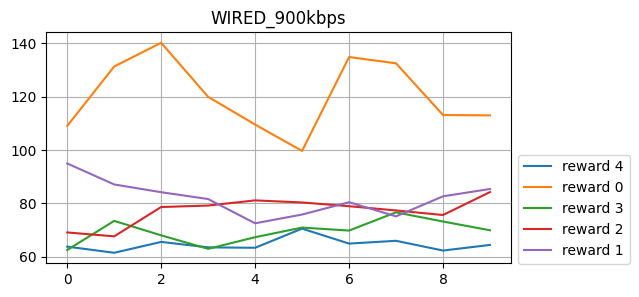

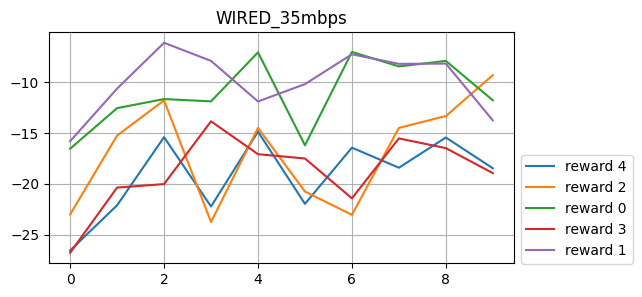

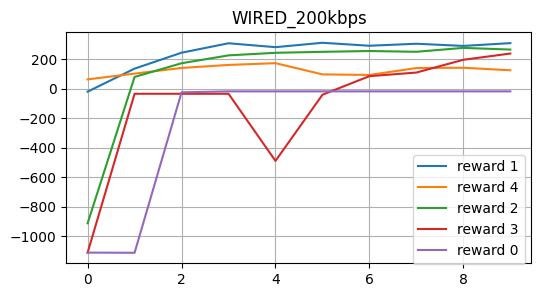

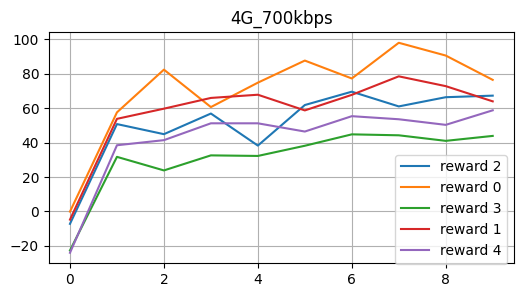

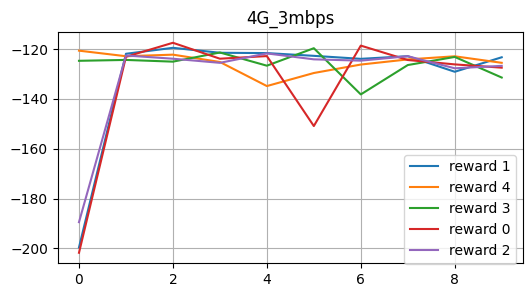

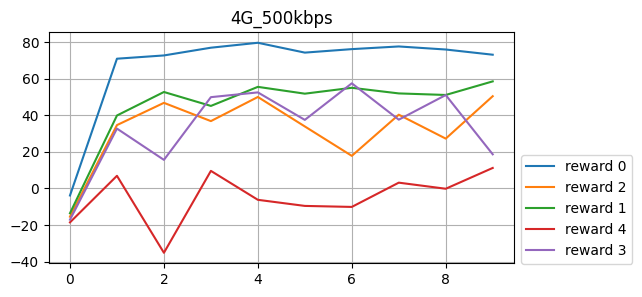

In [74]:
for trace in traces:

    plt.figure(figsize=(6,3))
    for i, row in dff[(dff.trace == trace)].iterrows():
        name = "reward " + str(int(row["reward_profile"]))
        data = row["cum_reward_list"]
        plt.plot(data, label=name)
        plt.title(trace)

    plt.grid()
    plt.legend(bbox_to_anchor=(1.0, 0.5))

## Find best algorithm conf

In [42]:
for i in range(10000,110000, 10000):
    print(i)

10000
20000
30000
40000
50000
60000
70000
80000
90000
100000


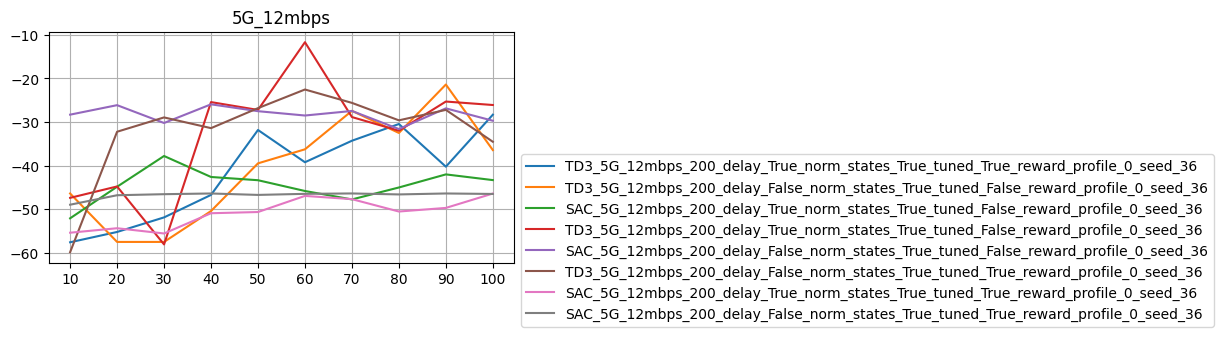

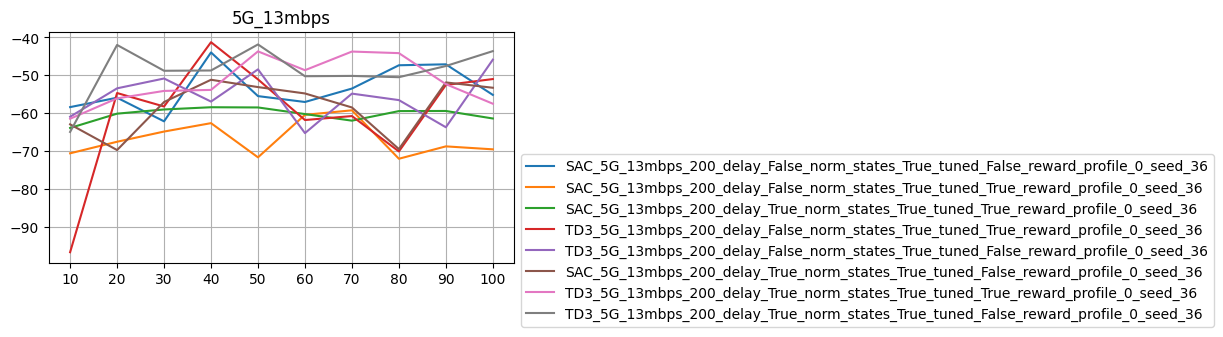

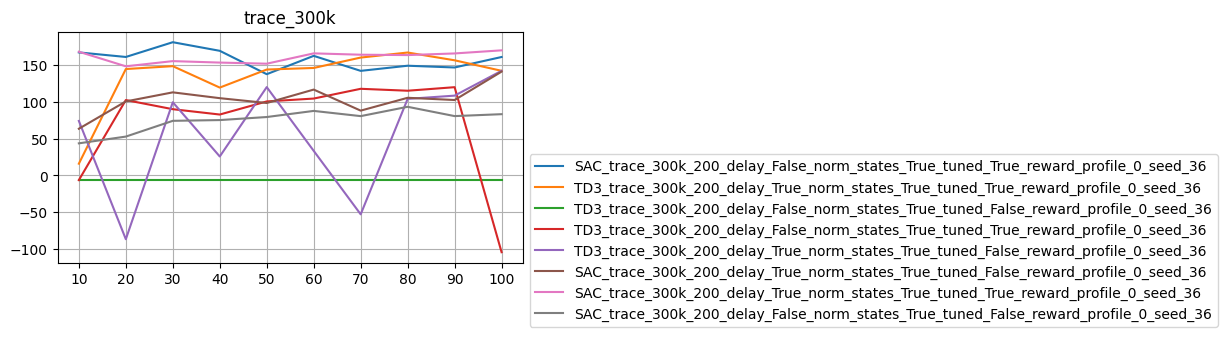

In [62]:
for trace in traces[-3:]:

    plt.figure(figsize=(6,3))
    for i, row in dff[(dff.trace == trace) \
                      & (dff.reward_profile == 0) \
                      & (dff.seed == 36)
                     ].iterrows():
        name = row["name"]
        data = row["cum_reward_list"]
        plt.plot(data, label=name)
        plt.title(trace)
        plt.xticks(range(0,10), range(10,110, 10))

    plt.grid()
    plt.legend(bbox_to_anchor=(1.0, 0.5))

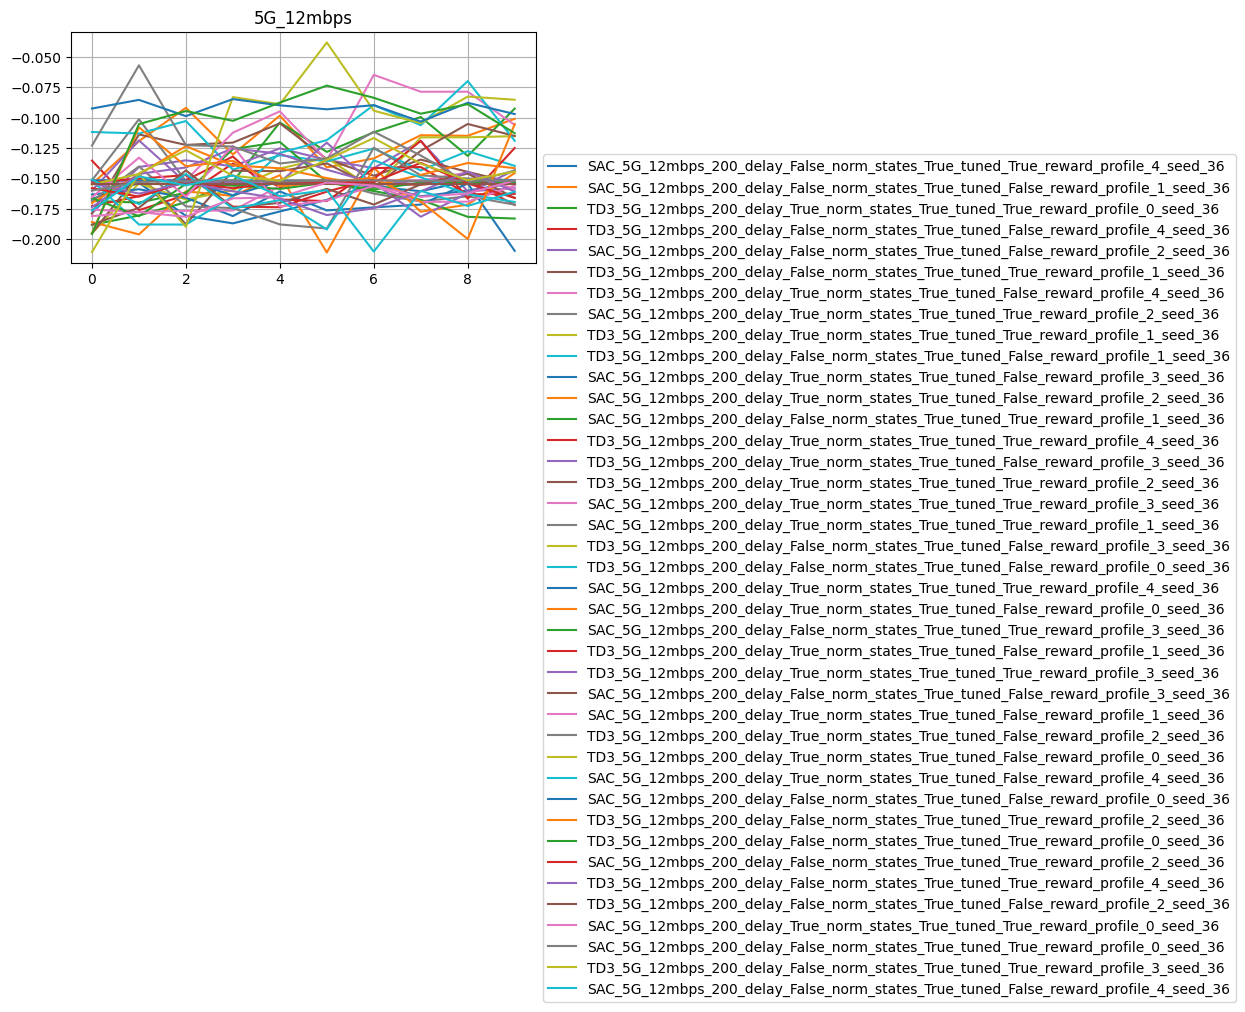

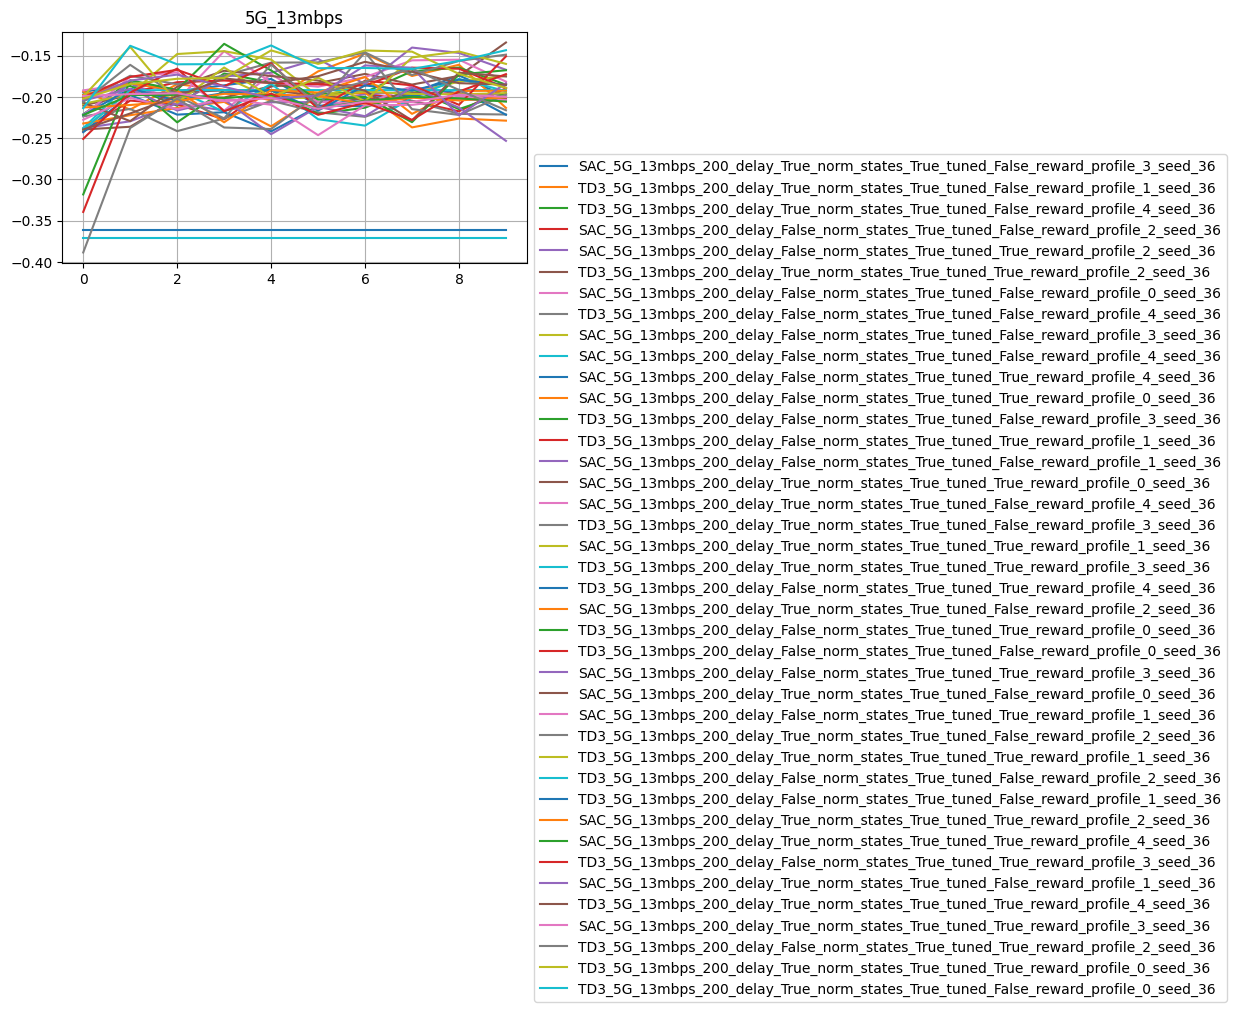

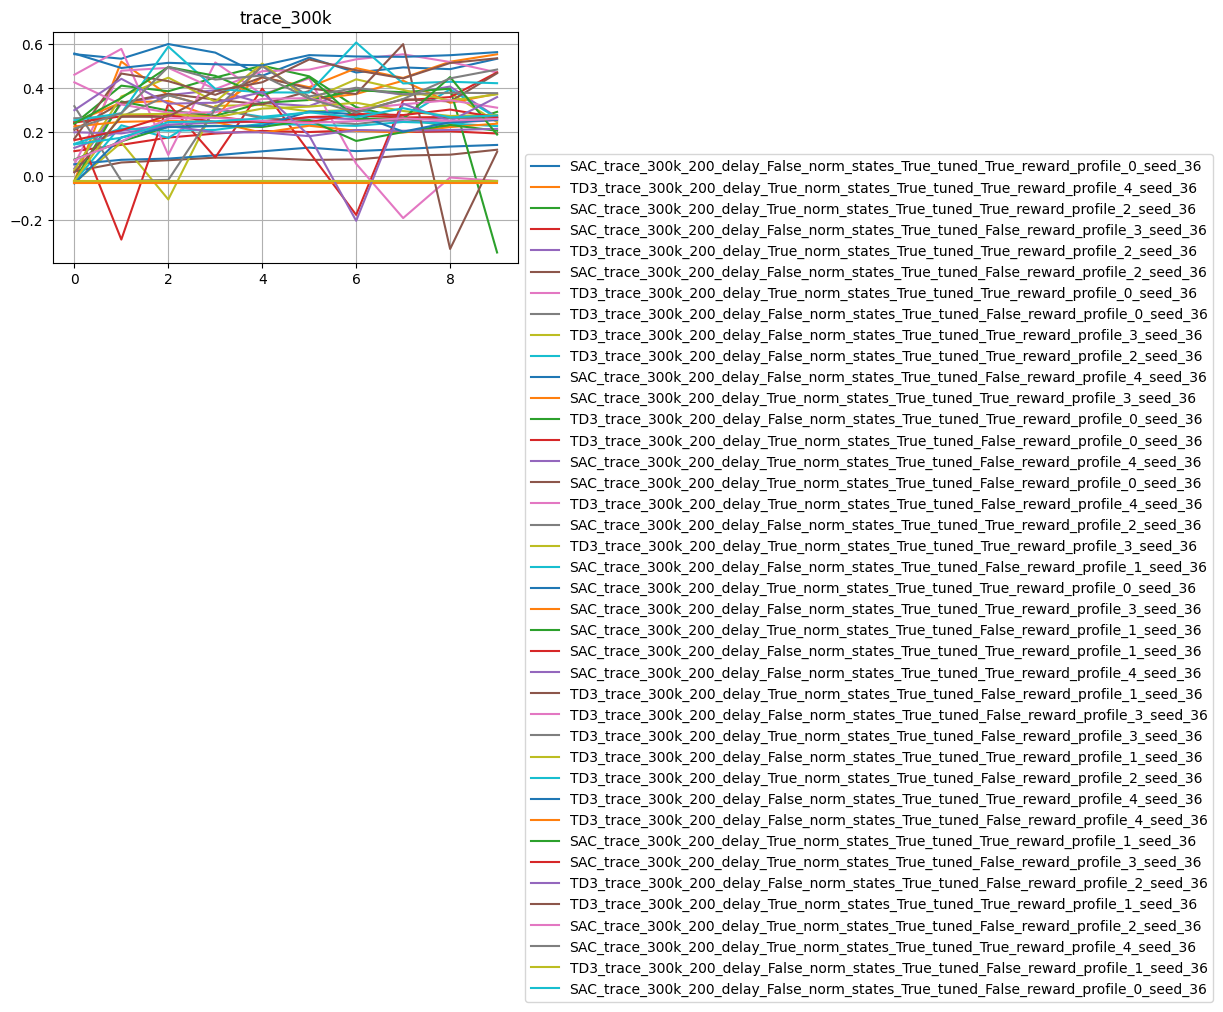

In [34]:
for trace in traces[-3:]:

    plt.figure(figsize=(6,3))
    for i, row in dff[(dff.trace == trace) & (seed == 36)].iterrows():
        name = row["name"]
        data = row["avg_reward_list"]
        plt.plot(data, label=name)
        plt.title(trace)

    plt.grid()
    plt.legend(bbox_to_anchor=(1.0, 0.5))

### Old

SAC_4G_700kbps_200_delay_True_norm_states_True_tuned_True
TD3_4G_700kbps_200_delay_True_norm_states_True_tuned_True
SAC_4G_700kbps_200_delay_False_norm_states_True_tuned_True
TD3_4G_700kbps_200_delay_False_norm_states_True_tuned_True


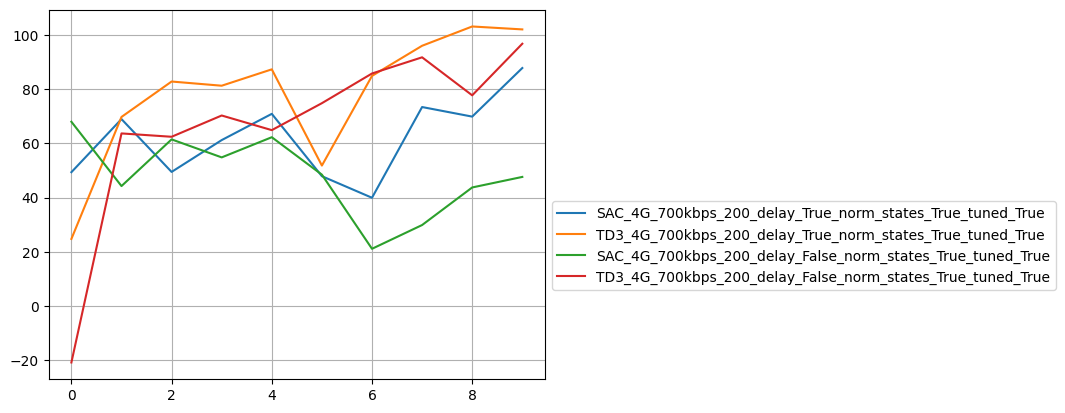

In [11]:
plt.figure()
for i, row in df[((df.trace == "4G_700kbps") & \
                  (df.last_reward > 0) & \
                 (df.step_time == 200) & \
                 (df.tuned == True))
                ].iterrows():
    name = row["name"]
    data = row.cum_reward_list
    print(name)
    plt.plot(data, label=name)
    
plt.grid()
plt.legend(bbox_to_anchor=(1.0, 0.5))

SAC_4G_700kbps_200_delay_False_norm_states_True_tuned_False
SAC_4G_700kbps_200_delay_True_norm_states_True_tuned_False
TD3_4G_700kbps_200_delay_True_norm_states_True_tuned_False


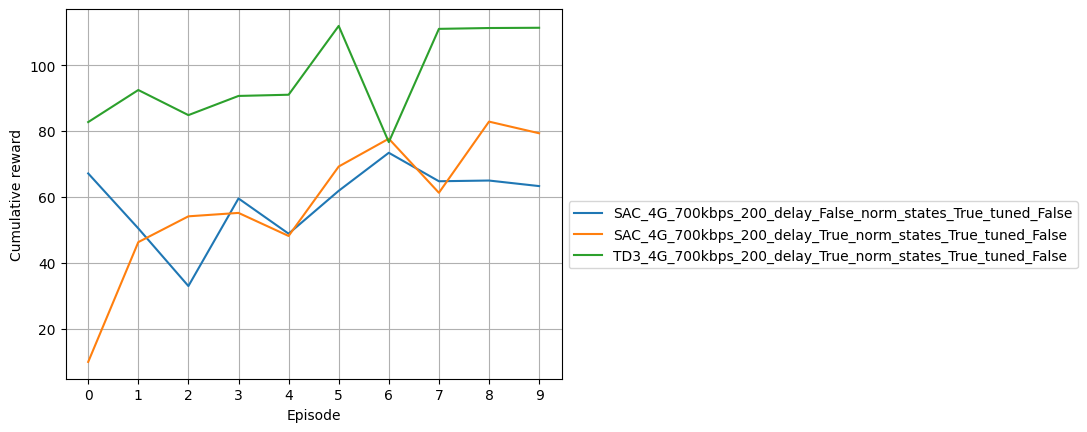

In [12]:
plt.figure()
for i, row in df[(df.trace == "4G_700kbps") & \
                 (df.last_reward > 0) & \
                 (df.step_time == 200) & \
                 (df.tuned == False)
                ].iterrows():
    name = row["name"]
    data = row.cum_reward
    print(name)
    plt.plot(data, label=name)
    plt.xticks(range(10), range(10))
    plt.xlabel("Episode")
    plt.ylabel("Cumulative reward")
    
plt.grid()
plt.legend(bbox_to_anchor=(1.0, 0.5))

TD3_4G_700kbps_200_delay_True_norm_states_True_tuned_True
TD3_4G_700kbps_200_delay_False_norm_states_True_tuned_True
TD3_4G_700kbps_200_delay_True_norm_states_True_tuned_False


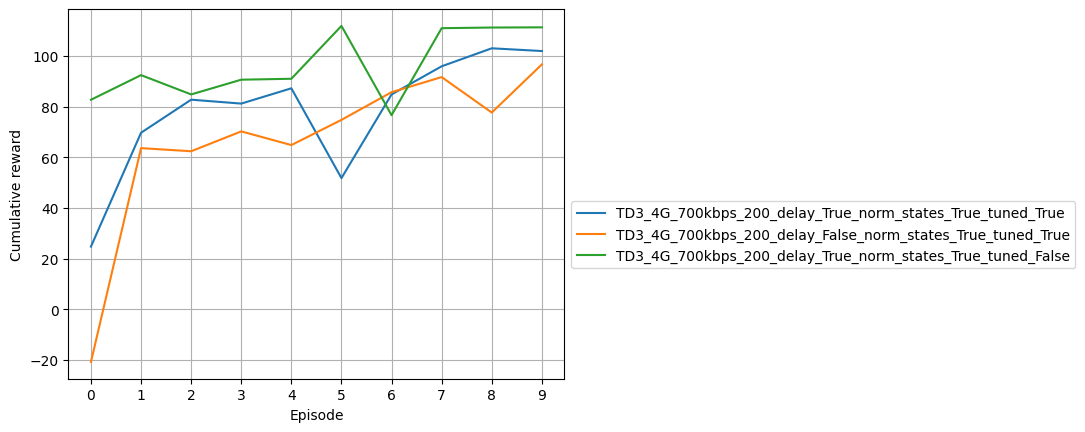

In [18]:
plt.figure()
for i, row in df[(df.trace == "4G_700kbps") & \
                 (df.last_reward > 0) & \
                 (df.step_time == 200) & \
                 (df.alg == "TD3") & \
                 (df.normalize_states == True)
                ].iterrows():
    name = row["name"]
    data = row.cum_reward
    print(name)
    plt.plot(data, label=name)
    plt.xticks(range(10), range(10))
    plt.xlabel("Episode")
    plt.ylabel("Cumulative reward")
    
plt.grid()
plt.legend(bbox_to_anchor=(1.0, 0.5))

In [85]:
df.trace.unique()

array(['WIRED_200kbps', 'WIRED_900kbps', '4G_700kbps', 'WIRED_35mbps',
       '4G_3mbps'], dtype=object)

## Filter manually by name

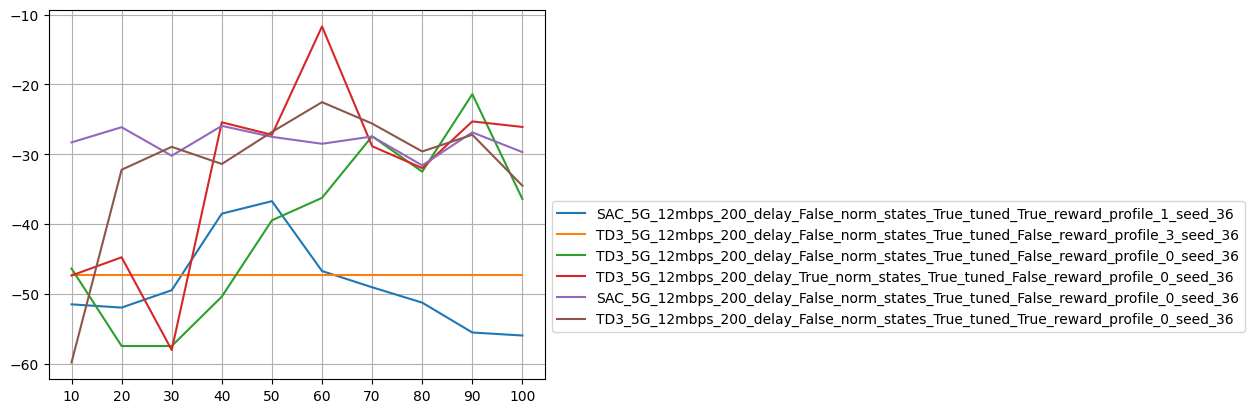

In [49]:
plt.figure()
for i, row in df[
    (df["name"] == "SAC_5G_12mbps_200_delay_False_norm_states_True_tuned_True_reward_profile_1_seed_36") | \
    (df["name"] == "SAC_5G_12mbps_200_delay_False_norm_states_True_tuned_False_reward_profile_0_seed_36") | \
    (df["name"] == "TD3_5G_12mbps_200_delay_True_norm_states_True_tuned_False_reward_profile_0_seed_36") | \
    (df["name"] == "TD3_5G_12mbps_200_delay_False_norm_states_True_tuned_False_reward_profile_3_seed_36") | \
    (df["name"] == "TD3_5G_12mbps_200_delay_False_norm_states_True_tuned_False_reward_profile_0_seed_36") | \
    (df["name"] == "TD3_5G_12mbps_200_delay_False_norm_states_True_tuned_True_reward_profile_0_seed_36")
                ].iterrows():
    name = row["name"]
    data = row.cum_reward_list
    plt.plot(data, label=name)
    plt.xticks(range(0,10), range(10,110, 10))
    
plt.grid()
plt.legend(bbox_to_anchor=(1.0, 0.5))

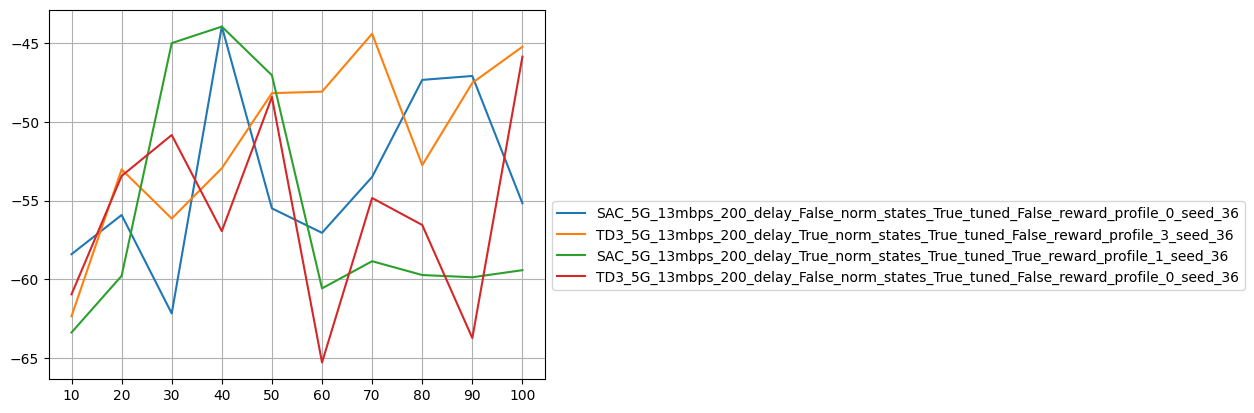

In [50]:
plt.figure()
for i, row in df[
    (df["name"] == "SAC_5G_13mbps_200_delay_False_norm_states_True_tuned_False_reward_profile_0_seed_36") | \
    (df["name"] == "TD3_5G_13mbps_200_delay_False_norm_states_True_tuned_False_reward_profile_0_seed_36") | \
    (df["name"] == "SAC_5G_13mbps_200_delay_True_norm_states_True_tuned_True_reward_profile_1_seed_36") | \
    (df["name"] == "TD3_5G_13mbps_200_delay_True_norm_states_True_tuned_False_reward_profile_3_seed_36")
                ].iterrows():
    name = row["name"]
    data = row.cum_reward_list
    plt.plot(data, label=name)
    plt.xticks(range(0,10), range(10,110, 10))
    
plt.grid()
plt.legend(bbox_to_anchor=(1.0, 0.5))